# Language Model (Transformer) 
**!! This model is too huge to be trained on my machine !!**

In [1]:
import pandas as pd
from fastai import *
from fastai.text import *

In [2]:
path = Path('/Users/jiajunkoh/projects/aa-nps')

In [3]:
data_lm = TextLMDataBunch.from_csv(path, 'data/preproc_nps_2018.csv')

In [ ]:
data_lm.show_batch()

In [5]:
data_lm.save('data/data_lm_export.pkl')

In [6]:
learn = language_model_learner(data_lm, Transformer, drop_mult=0.2)

In [7]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


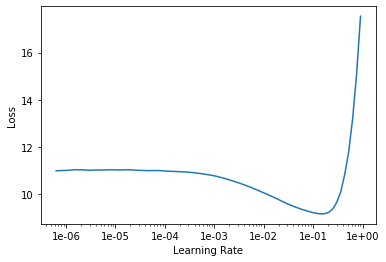

In [8]:
learn.recorder.plot()

In [9]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8, 0.7)) # explicitly give momentums
learn.save('transformer_language_model_checkpoint_1')

epoch,train_loss,valid_loss,accuracy,time
0,4.639529,4.538983,0.243378,2:54:21


In [ ]:
learn.predict('The internet is very bad and ', 30, temperature=1.1, min_p=0.001)

In [11]:
learn.unfreeze()
learn.fit_one_cycle(1, 1e-3, moms=(0.8, 0.7))
learn.save('transformer_language_model_checkpoint_2')

epoch,train_loss,valid_loss,accuracy,time
0,5.915595,5.870663,0.082138,3:38:08


In [ ]:
learn.predict('The web is very slow and ', 30, temperature=1.1, min_p=0.001)

In [13]:
learn.save_encoder('transformer_encoder')

In [14]:
learn.export('models/transformer_language_model.pkl')